## Verifying the equivalence of rescaled vs original data
Let's quickly verify that indeed, rescaling *before* feeding the image data into tensorflow, does not reduce the eventual quality of the images any more than when feeding in the original, high-res images.

In [4]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# setup general info on batch sizes and img sizes
batch_size = 32
img_height = 256
img_width = 256

In [6]:
# generate training dataset
train_ds_orig = tf.keras.utils.image_dataset_from_directory(
    os.path.join('..', 'Data', 'Cars'),
    validation_split= 0.2, # let the program know what the validation split will be in order to choose the correct size of this training set as well
    subset="training", # here we denote that this set will be the *training* set.
    seed=123,
    image_size = (img_height, img_width), # rescale images automatically
    batch_size= batch_size
) 

Found 31638 files belonging to 5 classes.
Using 25311 files for training.


In [7]:
# generate training dataset
train_ds_rescaled = tf.keras.utils.image_dataset_from_directory(
    os.path.join('..', 'Data', 'cars-rescaled'),
    validation_split= 0.2, # let the program know what the validation split will be in order to choose the correct size of this training set as well
    subset="training", # here we denote that this set will be the *training* set.
    seed=123,
    image_size = (img_height, img_width), # rescale images automatically
    batch_size= batch_size
) 

Found 31638 files belonging to 5 classes.
Using 25311 files for training.


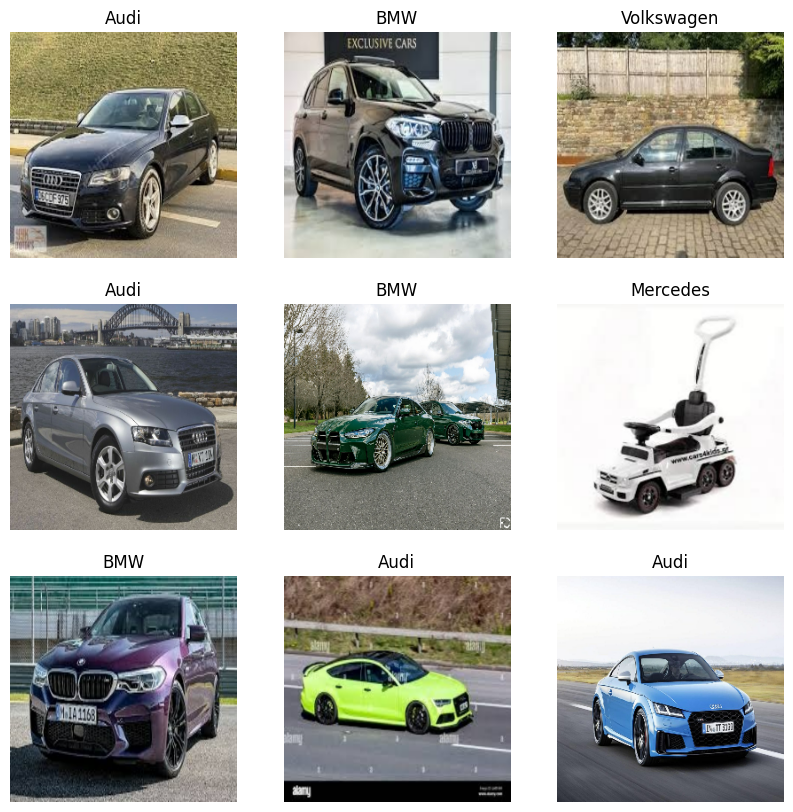

In [8]:
# automatic labelling with this object, based on dict names.
class_names = train_ds_orig.class_names

# Visualisation of the images to check the labels
plt.figure(figsize=(10, 10))
for images, labels in train_ds_orig.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

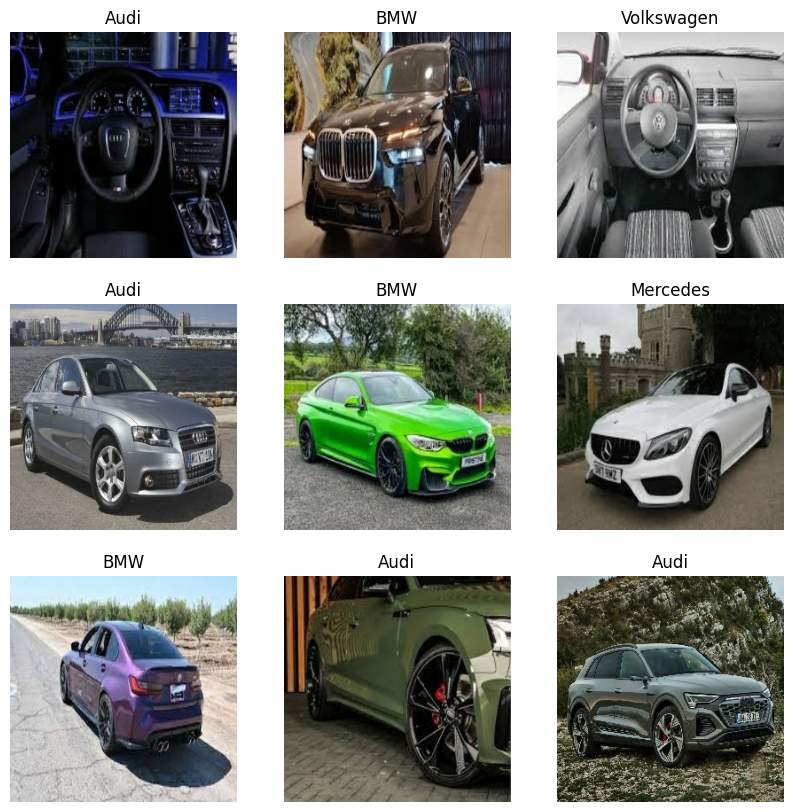

In [9]:
# automatic labelling with this object, based on dict names.
class_names = train_ds_orig.class_names

# Visualisation of the images to check the labels
plt.figure(figsize=(10, 10))
for images, labels in train_ds_rescaled.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")